In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import re


In [124]:
df = pd.read_csv(r'C:\Users\Owner\PycharmProjects\NBA_Data_Dive\NBA_Data.csv', encoding='utf-8', comment='#', sep=',')
print (df[['TEAM_ABBREVIATION', 'CS_FG3_PCT']].groupby(['TEAM_ABBREVIATION'], as_index=False).mean())

   TEAM_ABBREVIATION  CS_FG3_PCT
0                ATL    0.290522
1                BKN    0.291576
2                BOS    0.308179
3                CHA    0.281123
4                CHI    0.270404
5                CLE    0.290662
6                DAL    0.328694
7                DEN    0.325256
8                DET    0.286504
9                GSW    0.324383
10               HOU    0.371348
11               IND    0.327876
12               LAC    0.366149
13               LAL    0.341061
14               MEM    0.366010
15               MIA    0.371676
16               MIL    0.254171
17               MIN    0.266411
18               NOP    0.361885
19               NYK    0.310223
20               OKC    0.299481
21               ORL    0.285695
22               PHI    0.312055
23               PHX    0.319323
24               POR    0.255927
25               SAC    0.296172
26               SAS    0.267479
27               TOR    0.290424
28             TOTAL    0.330567
29        

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 96 columns):
PlAYER_ID               611 non-null int64
PLAYER                  611 non-null object
FIRST_NAME              611 non-null object
LAST_NAME               611 non-null object
TEAM_ABBREVIATION       611 non-null object
GP                      611 non-null int64
MIN                     611 non-null float64
PU_PPG                  611 non-null float64
PU_FGM_PG               611 non-null float64
PU_FGA_PG               611 non-null float64
PU_FG_PCT               554 non-null float64
PU_FG3M_PG              611 non-null float64
PU_FG3A_PG              611 non-null float64
PU_FG3_PCT              426 non-null float64
PU_EFG_PCT              554 non-null float64
PU_PTS_TOT              611 non-null int64
DVS                     611 non-null float64
DVS_PPG                 611 non-null float64
DVS_TPPG                611 non-null float64
DVS_FG_PCT              536 non-null float64
DVS_P

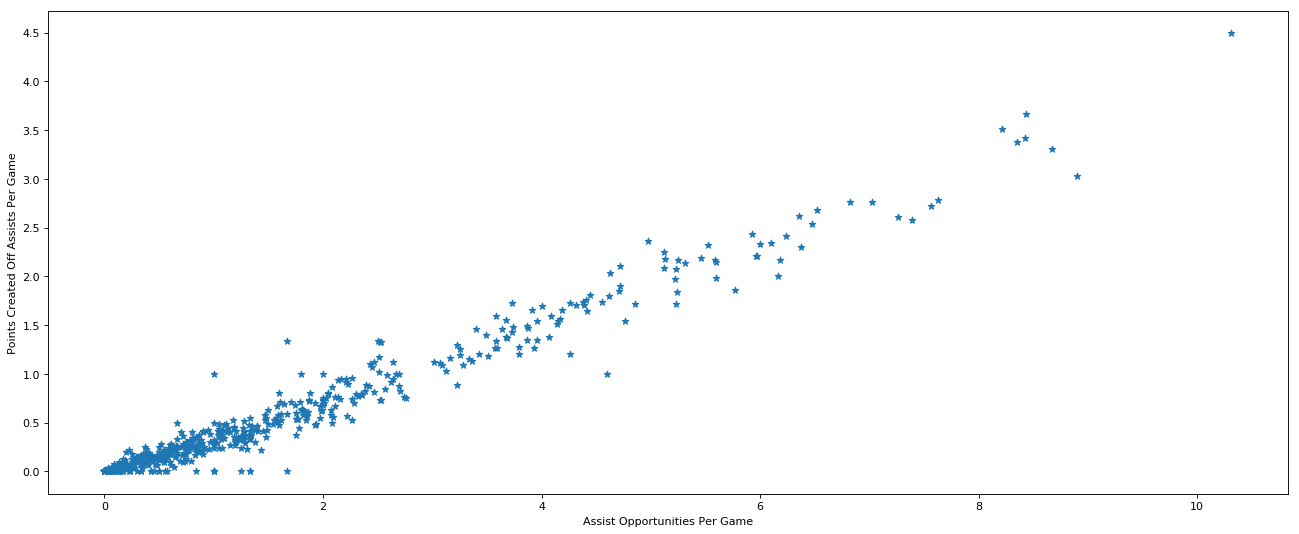

In [128]:
plt.figure(figsize=(20,8), dpi=80)
plt.scatter(df['PU_FGA_PG'], df['PU_FGM_PG'], marker='*')

plt.xlabel('Assist Opportunities Per Game')
plt.ylabel('Points Created Off Assists Per Game')
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
plt.show()

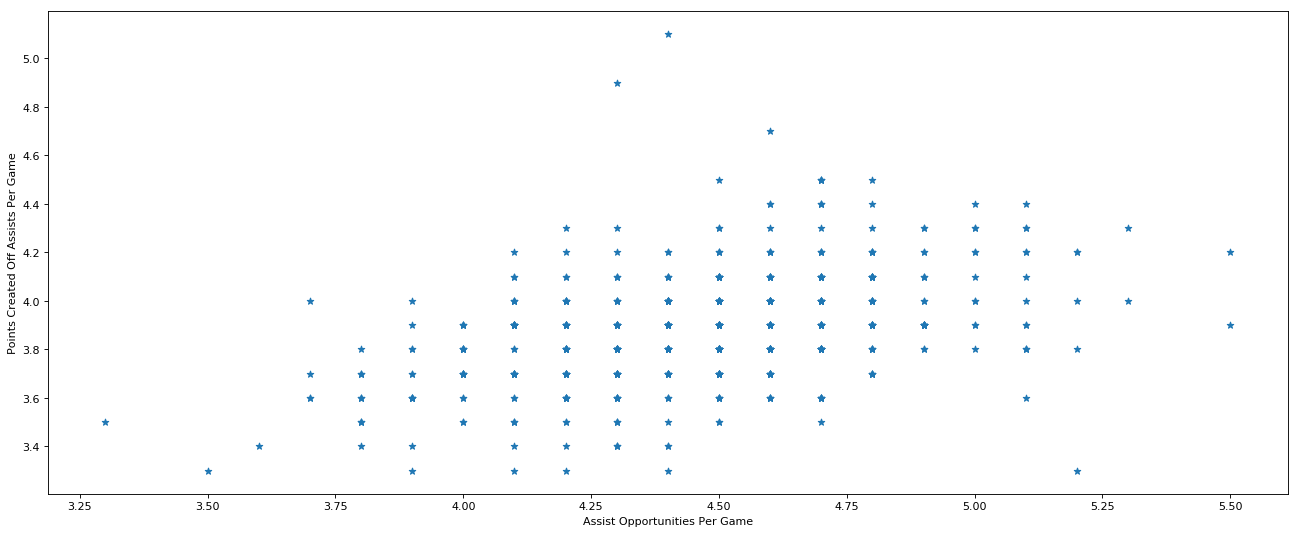

In [129]:
plt.figure(figsize=(20,8), dpi=80)
plt.scatter(df['AVG_SPD_OFF'], df['AVG_SPD_DEF'], marker='*')

plt.xlabel('Assist Opportunities Per Game')
plt.ylabel('Points Created Off Assists Per Game')
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
plt.show()

In [130]:
df = df[['PlAYER_ID','TEAM_ABBREVIATION', 'CS_EFG_PCT', 'PU_EFG_PCT', 'EFG_PCT']]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 5 columns):
PlAYER_ID            611 non-null int64
TEAM_ABBREVIATION    611 non-null object
CS_EFG_PCT           577 non-null float64
PU_EFG_PCT           554 non-null float64
EFG_PCT              604 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 23.9+ KB


In [131]:
print (df[['TEAM_ABBREVIATION', 'CS_EFG_PCT', 'PU_EFG_PCT', 'EFG_PCT']].groupby(['TEAM_ABBREVIATION'], as_index=False).mean())

   TEAM_ABBREVIATION  CS_EFG_PCT  PU_EFG_PCT   EFG_PCT
0                ATL    0.491035    0.333025  0.464411
1                BKN    0.457501    0.374717  0.490177
2                BOS    0.479578    0.317680  0.481909
3                CHA    0.415854    0.310840  0.436549
4                CHI    0.473995    0.335254  0.452757
5                CLE    0.449276    0.313482  0.423526
6                DAL    0.490867    0.363755  0.508483
7                DEN    0.490830    0.345042  0.484966
8                DET    0.376926    0.387990  0.469800
9                GSW    0.425702    0.340028  0.445329
10               HOU    0.518656    0.318230  0.509842
11               IND    0.484888    0.426446  0.484537
12               LAC    0.480983    0.359029  0.493314
13               LAL    0.529351    0.367619  0.468444
14               MEM    0.493340    0.362972  0.498798
15               MIA    0.478521    0.378707  0.555809
16               MIL    0.441776    0.346961  0.485056
17        

In [140]:
for column in df.columns[2:]:
    avg_CS = df[column].mean()
    std_CS = df[column].std()
    print(column)
    print('Mean ', avg_CS)
    print('Std deviation: %0.2f' % std_CS)
    null_count = df[column].isnull().sum()
    
    print(avg_CS - std_CS)
    print(avg_CS + std_CS)
    
    CS_null_list = np.random.uniform(avg_CS - std_CS, avg_CS + std_CS, size=null_count)
    print(CS_null_list)
    # df = df.assign(withRandom=pd.Series(df['PU_EFG_PCT'].values))
    # print(CS_null_list)
    
    
    df[column][np.isnan(df[column])] = CS_null_list
    # df['CS_EFG_PCT', 'NEW']
    # print(null_count = df['CS_EFG_PCT'].isNull().sum())

df.head(n=100)


CS_EFG_PCT
Mean  0.46223587017939194
Std deviation: 0.16
0.298106496384025
0.6263652439747589
[]
PU_EFG_PCT
Mean  0.35859117501941085
Std deviation: 0.16
0.19610475221620643
0.5210775978226152
[]
EFG_PCT
Mean  0.47303214986237
Std deviation: 0.11
0.3667583142844494
0.5793059854402907
[]


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PlAYER_ID,TEAM_ABBREVIATION,CS_EFG_PCT,PU_EFG_PCT,EFG_PCT
0,101106,GSW,0.375000,0.416667,0.623656
1,101107,UTA,0.501678,0.358491,0.519011
2,101108,LAC,0.598901,0.476099,0.511494
3,101109,NYK,0.494118,0.382488,0.445724
4,101110,WAS,0.597796,0.372449,0.558520
5,101111,DET,0.366071,0.450000,0.456522
6,101112,PHX,0.554241,0.395522,0.534704
7,101114,BKN,0.635468,0.441071,0.518156
8,101115,CLE,0.333333,0.235294,0.418719
9,101115,IND,0.500000,0.285236,0.409091


In [141]:
y = df['TEAM_ABBREVIATION'].values
X = df.iloc[:,2:5].values

In [142]:
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
l_encoder.fit(y)
l_encoder.classes_

array(['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS',
       'TOR', 'TOTAL', 'UTA', 'WAS'], dtype=object)

In [143]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [144]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS',
       'TOR', 'TOTAL', 'UTA', 'WAS'], dtype=object)

In [151]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, random_state=123)
print('Team names: ', np.unique(y_train))
print('Proportions:? ', np.bincount(y_train))

Team names:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Proportions:?  [11 13 12 18 14 17  9  9 10 13 13 10 14 14 12 12 15  8 15 11 13 12 15 11  9
 14 13 16 47 14 13]


In [152]:
df.head(50)


,PlAYER_ID,TEAM_ABBREVIATION,CS_EFG_PCT,PU_EFG_PCT,EFG_PCT
0,101106,GSW,0.375000,0.416667,0.623656
1,101107,UTA,0.501678,0.358491,0.519011
2,101108,LAC,0.598901,0.476099,0.511494
3,101109,NYK,0.494118,0.382488,0.445724
4,101110,WAS,0.597796,0.372449,0.558520
5,101111,DET,0.366071,0.450000,0.456522
6,101112,PHX,0.554241,0.395522,0.534704
7,101114,BKN,0.635468,0.441071,0.518156
8,101115,CLE,0.333333,0.235294,0.418719
9,101115,IND,0.500000,0.285236,0.409091


In [153]:
for column in df.columns[2:]:
    avg_CS = df[column].mean()
    std_CS = df[column].std()
    print(column)
    print('Mean ', avg_CS)
    print('Std deviation: %0.2f' % std_CS)
    null_count = df[column].isnull().sum()
    
    print(avg_CS - std_CS)
    print(avg_CS + std_CS)
    
    CS_null_list = np.random.uniform(avg_CS - std_CS, avg_CS + std_CS, size=null_count)
    print(CS_null_list)
    # df = df.assign(withRandom=pd.Series(df['PU_EFG_PCT'].values))
    # print(CS_null_list)
    
    
    df[column][np.isnan(df[column])] = CS_null_list
    # df['CS_EFG_PCT', 'NEW']
    # print(null_count = df['CS_EFG_PCT'].isNull().sum())

df.head(n=100)


# print(X_train[426])

CS_EFG_PCT
Mean  0.46223587017939194
Std deviation: 0.16
0.298106496384025
0.6263652439747589
[]
PU_EFG_PCT
Mean  0.35859117501941085
Std deviation: 0.16
0.19610475221620643
0.5210775978226152
[]
EFG_PCT
Mean  0.47303214986237
Std deviation: 0.11
0.3667583142844494
0.5793059854402907
[]


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PlAYER_ID,TEAM_ABBREVIATION,CS_EFG_PCT,PU_EFG_PCT,EFG_PCT
0,101106,GSW,0.375000,0.416667,0.623656
1,101107,UTA,0.501678,0.358491,0.519011
2,101108,LAC,0.598901,0.476099,0.511494
3,101109,NYK,0.494118,0.382488,0.445724
4,101110,WAS,0.597796,0.372449,0.558520
5,101111,DET,0.366071,0.450000,0.456522
6,101112,PHX,0.554241,0.395522,0.534704
7,101114,BKN,0.635468,0.441071,0.518156
8,101115,CLE,0.333333,0.235294,0.418719
9,101115,IND,0.500000,0.285236,0.409091


In [154]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=1, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
print('Test accuracy %.2f' %lr.score(X_test, y_test))

NameError: name 'X_test' is not defined